# Genetic Variation Analysis for Predicting Multiple Sclerosis (MS) Using SNP Data

**Title:- Data Analysis Project**

Name:- P.Venkatesh

**Reg No:- 36823025**



# Project Overview
The primary objective of this project is to investigate associations between genetic variations (Single Nucleotide Polymorphisms, or SNPs) and Multiple Sclerosis (MS) risk factors. Using machine learning and statistical techniques, the project aims to analyze, predict, and recommend insights based on the identified genetic markers. This analysis is divided into four analytical types:<BR>

**1.Descriptive Analytics<BR>
2.Diagnostic Analytics<BR>
3.Predictive Analytics**

Each analytical approach provides a deeper understanding of the role of SNPs in MS.



In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


# 1. Data Loading and Preparation
**Dataset**
The dataset used in this analysis is sourced from SNP associations with MS (MONDO_0005301_associations_exportmscv.csv). It contains columns such as riskFrequency, orValue, pValue, traitName, mappedGenes, and more. Each row represents an SNP and its corresponding characteristics related to MS

In [3]:
# Load the dataset
file_path = 'MONDO_0005301_associations_exportmscv.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,riskAllele,pValue,pValueAnnotation,riskFrequency,orValue,beta,ci,mappedGenes,traitName,efoTraits,bgTraits,accessionId,locations,pubmedId,author
0,rs117518546-T,2.000000e-25,-,0.345,2.916,-,-,IGHG1,Neuromyelitis optica spectrum disorder (AQP4-I...,AQP4-IgG-positive neuromyelitis optica,-,GCST90277235,14:105737776,33559384,Zhong X
1,rs28383224-A,6.000000e-12,-,0.42,2.24,-,[1.78-2.82],"HLA-DRB1,HLA-DQA1",Neuromyelitis optica,neuromyelitis optica,-,GCST005964,6:32615876,29769526,Estrada K
2,rs1150757-A,7.000000e-12,-,0.10,2.86,-,[1.98-4.14],TNXB,Neuromyelitis optica,neuromyelitis optica,-,GCST005964,6:32061428,29769526,Estrada K
3,HLA-DRB1*03:01-?,2.000000e-12,-,0.12,2.71,-,[2.05-3.57],-,Neuromyelitis optica,neuromyelitis optica,-,GCST005964,-,29769526,Estrada K
4,HLA-B*08:01-?,6.000000e-12,-,0.11,2.72,-,[2.05-3.63],-,Neuromyelitis optica,neuromyelitis optica,-,GCST005964,-,29769526,Estrada K


**Columns (Attributes)**
Below are key columns that appear in this dataset, along with explanations:
<BR><br>
**riskAllele:** The specific allele (variant) of the SNP that is associated with MS risk. Alleles are variations of a gene, and certain alleles are known to increase disease susceptibility.
<BR><br>
**riskFrequency:** The frequency with which the risk allele appears in the population. A higher frequency can suggest more prevalent genetic markers in the general population, while lower frequencies may indicate rare variants.
<BR><br>
**orValue (Odds Ratio):** The odds ratio is a measure of association between the SNP and MS risk. Values above 1 suggest that the allele may increase the risk of MS, while values below 1 suggest a potential protective effect.
<BR><br>
**pValue:** A statistical measure that indicates the significance of the association between the SNP and MS risk. Lower p-values (e.g., < 0.05) suggest a stronger association.
<br><br>
**traitName**: The specific type of trait or condition associated with the SNP, such as relapsing-remitting MS (RRMS), primary progressive MS (PPMS), or general MS susceptibility.
<BR><br>
**mappedGenes:** This column lists the gene(s) associated with the SNP. Identifying the mapped gene(s) helps researchers focus on specific genes potentially involved in MS.
<BR><br>
**Study ID / Source:** Sometimes datasets include information on the study or research source that identified the association, which adds credibility to the SNP association data.<BR><br>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   riskAllele        944 non-null    object 
 1   pValue            944 non-null    float64
 2   pValueAnnotation  944 non-null    object 
 3   riskFrequency     944 non-null    object 
 4   orValue           944 non-null    object 
 5   beta              944 non-null    object 
 6   ci                944 non-null    object 
 7   mappedGenes       944 non-null    object 
 8   traitName         944 non-null    object 
 9   efoTraits         944 non-null    object 
 10  bgTraits          944 non-null    object 
 11  accessionId       944 non-null    object 
 12  locations         944 non-null    object 
 13  pubmedId          944 non-null    int64  
 14  author            944 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 110.8+ KB


**PRE PROCESSING**

In [6]:
# Convert relevant columns to numeric, handling any errors
for col in ['riskFrequency', 'orValue', 'pValue', 'beta']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [7]:
# Filter for "multiple sclerosis" in traitName and drop rows with missing values in essential columns
ms_data = data[data['traitName'].str.contains("multiple sclerosis", case=False, na=False)]
ms_data = ms_data.dropna(subset=['riskFrequency', 'orValue', 'pValue'])

In [8]:
#Impute missing values in 'beta' or 'ci' if necessary
ms_data['beta'].fillna(ms_data['beta'].mean(), inplace=True)  #  mean
ms_data['ci'].fillna("Not Specified", inplace=True)  # Categorical imputation

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_1914/1506147216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ms_data['beta'].fillna(ms_data['beta'].mean(), inplace=True)  #  mean
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_1914/1506147216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

# Descriptive Analytics
Descriptive analytics provides an overview of key data distributions and statistics to identify trends and outliers.

Method 1: Summary Statistics<br>
Method 2: Frequency Distribution Plots<br>
Method 3: Box Plots for Outliers<br>

In [9]:
# Method 1: Summary Statistics
print("Summary Statistics:")
print(data[['riskFrequency', 'pValue', 'orValue']].describe())

Summary Statistics:
       riskFrequency         pValue     orValue
count     320.000000   9.440000e+02  730.000000
mean        0.392388   1.175254e-06    1.283082
std         0.236411   2.262816e-06    0.629095
min         0.020000  1.000000e-234    0.630000
25%         0.200000   6.000000e-13    1.076025
50%         0.360000   1.000000e-08    1.100000
75%         0.542500   1.000000e-06    1.160000
max         0.960000   1.000000e-05    8.300000


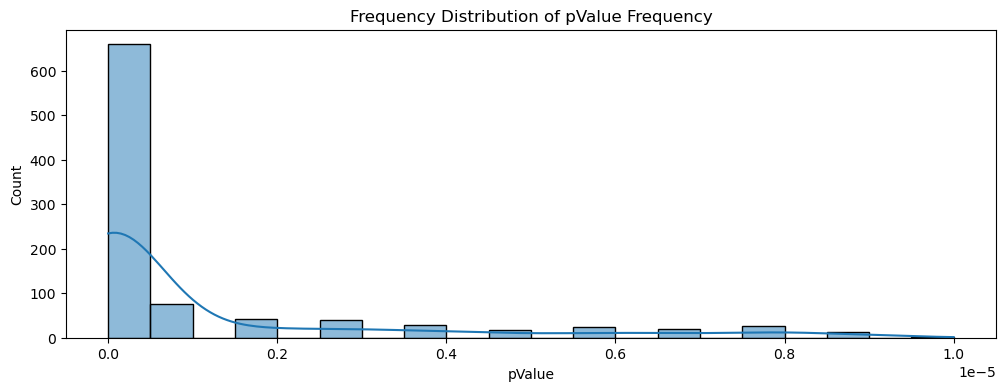

In [11]:
# Method 2: Frequency Distribution Plots
plt.figure(figsize=(12, 4))
sns.histplot(data['pValue'].dropna(), bins=20, kde=True)
plt.title('Frequency Distribution of pValue Frequency')
plt.xlabel('pValue')
plt.ylabel('Count')
plt.show()

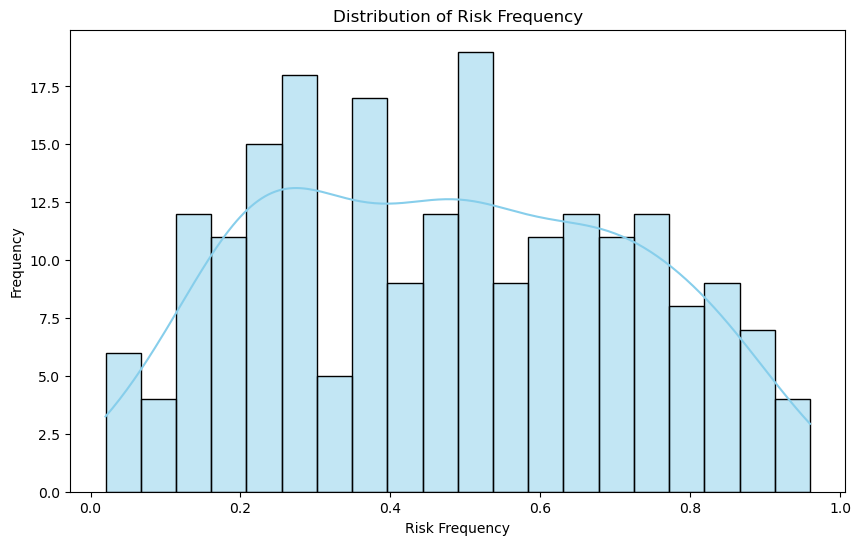

In [12]:
# Distribution of Risk Frequency
plt.figure(figsize=(10, 6))
sns.histplot(ms_data['riskFrequency'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Risk Frequency")
plt.xlabel("Risk Frequency")
plt.ylabel("Frequency")
plt.show()

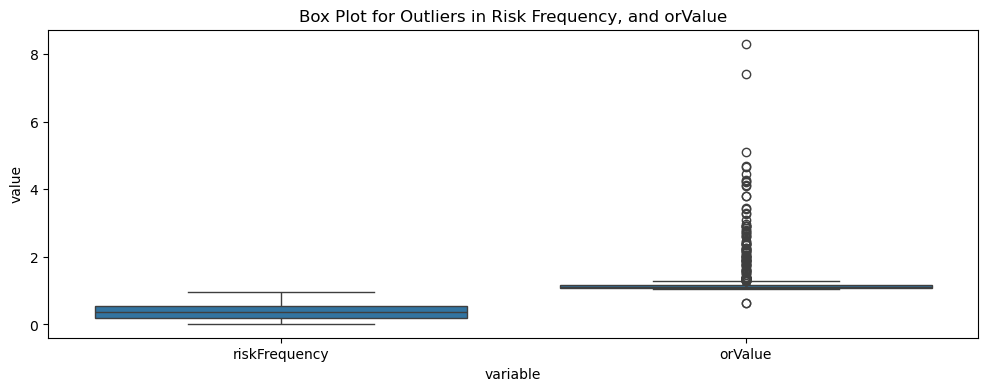

In [41]:
# Method 3: Box Plots for Outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['riskFrequency', 'orValue']]))
plt.title('Box Plot for Outliers in Risk Frequency, and orValue')
plt.show()

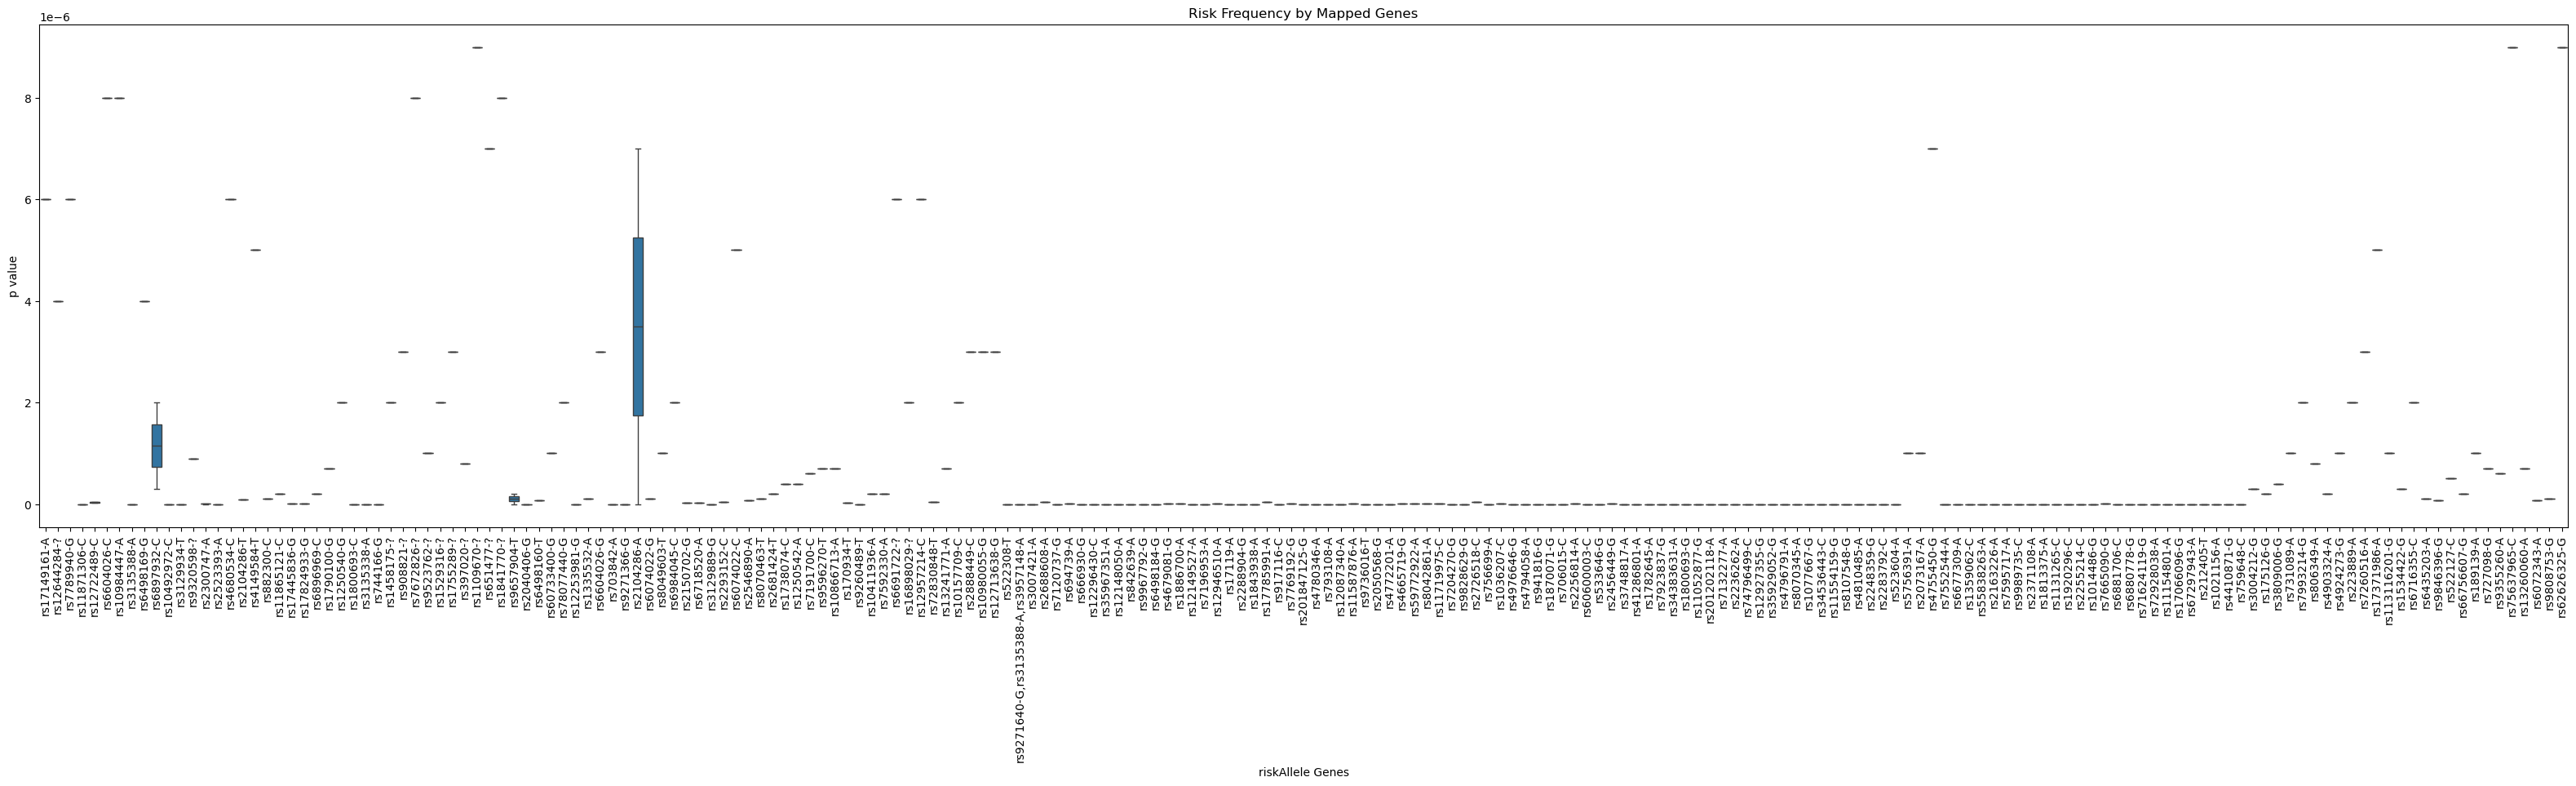

In [14]:
# Box plot to compare riskFrequency by mappedGenes
plt.figure(figsize=(40, 8))
sns.boxplot(data=ms_data, x='riskAllele', y='pValue')
plt.xticks(rotation=90)
plt.title("Risk Frequency by Mapped Genes")
plt.xlabel("riskAllele Genes")
plt.ylabel("p value")
plt.show()

<Axes: xlabel='pValue', ylabel='orValue'>

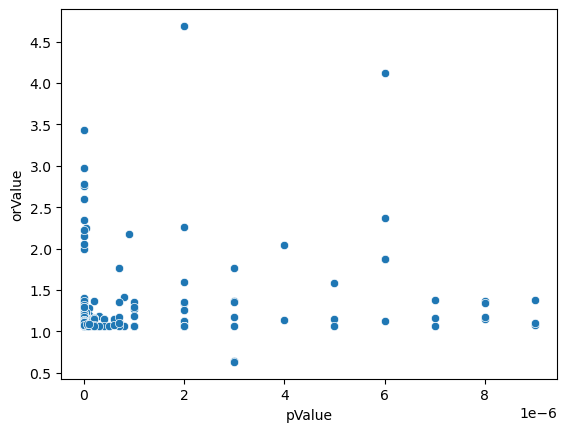

In [15]:
sns.scatterplot (data = ms_data , x = "pValue" , y = "orValue")

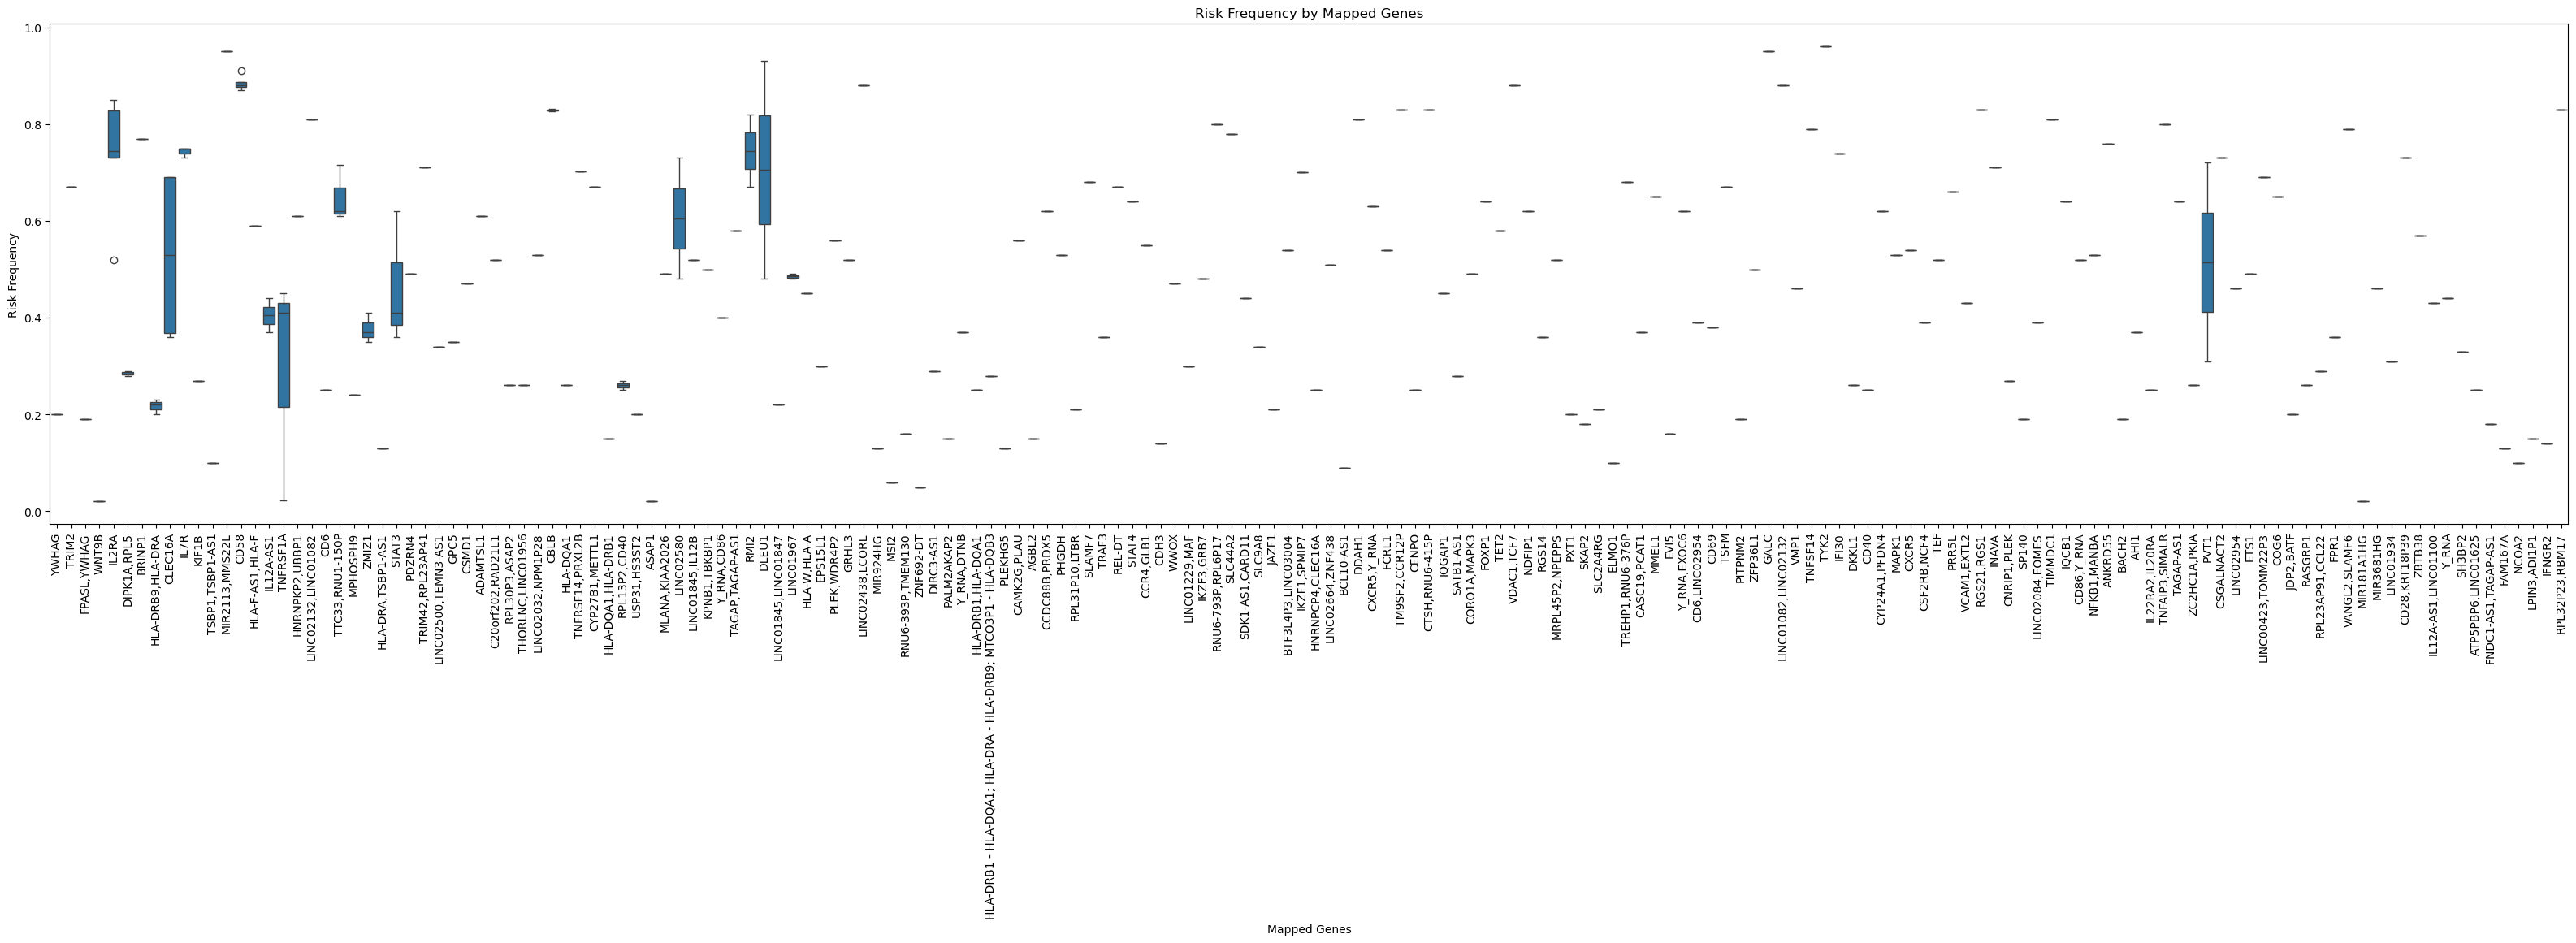

In [16]:
# Box plot to compare riskFrequency by mappedGenes
plt.figure(figsize=(40, 8))
sns.boxplot(data=ms_data, x='mappedGenes', y='riskFrequency')
plt.xticks(rotation=90)
plt.title("Risk Frequency by Mapped Genes")
plt.xlabel("Mapped Genes")
plt.ylabel("Risk Frequency")
plt.show()

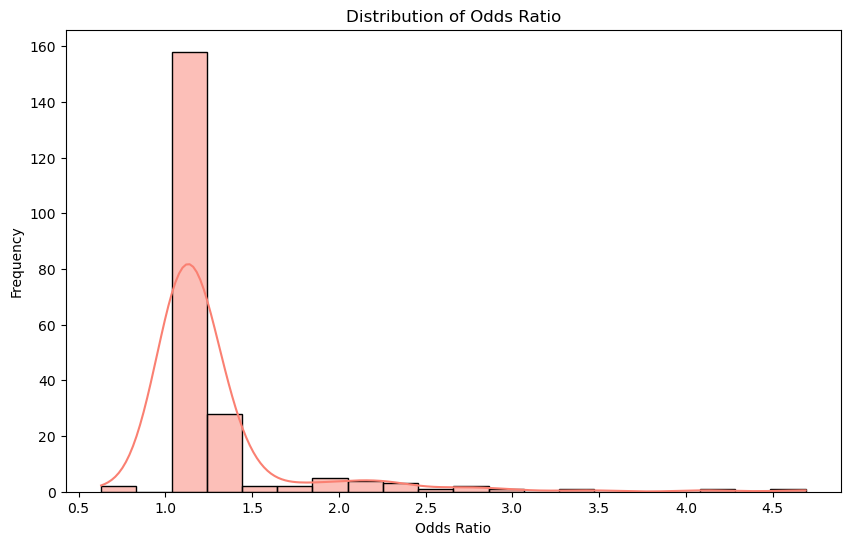

In [17]:
# Distribution of Odds Ratio (orValue)
plt.figure(figsize=(10, 6))
sns.histplot(ms_data['orValue'].dropna(), bins=20, kde=True, color='salmon')
plt.title("Distribution of Odds Ratio")
plt.xlabel("Odds Ratio")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Analyzing summary statistics by MS type
ms_types = ms_data['traitName'].unique()
for ms_type in ms_types:
    print(f"\n{ms_type} Summary Statistics:")
    print(ms_data[ms_data['traitName'] == ms_type][['pValue', 'riskFrequency', 'orValue']].describe())


Multiple sclerosis Summary Statistics:
              pValue  riskFrequency     orValue
count   1.980000e+02     198.000000  198.000000
mean    8.691389e-07       0.484682    1.214949
std     2.013082e-06       0.231984    0.314119
min    4.000000e-225       0.020000    1.060000
25%     6.000000e-15       0.272500    1.090000
50%     2.000000e-09       0.485000    1.120000
75%     4.750000e-07       0.670000    1.190000
max     9.000000e-06       0.960000    3.430000

Relapse in treatment-naive multiple sclerosis (time to event) Summary Statistics:
             pValue  riskFrequency  orValue
count  1.000000e+00           1.00     1.00
mean   2.000000e-10           0.02     2.15
std             NaN            NaN      NaN
min    2.000000e-10           0.02     2.15
25%    2.000000e-10           0.02     2.15
50%    2.000000e-10           0.02     2.15
75%    2.000000e-10           0.02     2.15
max    2.000000e-10           0.02     2.15

Multiple sclerosis (OCB status) Summary Statistics:
             pValue  riskFrequency  orValue
count  1.000000e+00          1.000     1.00
mean   9.000000e-07          0.951     2.17
std             NaN            NaN      NaN
min    9.000000e-07          0.951     2.17
25%    9.000000e-07          0.951     2.17
50%    9.000000e-07          0.951     2.17
75%    9.000000e-07          0.951     2.17
max    9.000000e-07          0.951     2.17

Response to interferon beta in multiple sclerosis Summary Statistics:
         pValue  riskFrequency  orValue
count  3.000000       3.000000  3.00000
mean   0.000005       0.509800  3.72730
std    0.000002       0.374737  1.20929
min    0.000002       0.130500  2.37000
25%    0.000004       0.324800  3.24595
50%    0.000006       0.519100  4.12190
75%    0.000006       0.699450  4.40595
max    0.000006       0.879800  4.69000

Decreased low contrast letter acuity in multiple sclerosis Summary Statistics:
             pValue  riskFrequency   orValue
count  6.000000e+00       6.000000  6.000000
mean   1.956667e-06       0.180000  1.551667
std    1.305399e-06       0.127122  0.743113
min    4.000000e-08       0.050000  0.630000
25%    1.025000e-06       0.082500  0.920000
50%    2.500000e-06       0.155000  1.765000
75%    3.000000e-06       0.257500  2.130000
max    3.000000e-06       0.370000  2.260000

Neutralising antibody response to interferon beta therapy in multiple sclerosis (presence of antibodies) Summary Statistics:
             pValue  riskFrequency  orValue
count  1.000000e+00           1.00      1.0
mean   2.000000e-15           0.25      2.6
std             NaN            NaN      NaN
min    2.000000e-15           0.25      2.6
25%    2.000000e-15           0.25      2.6
50%    2.000000e-15           0.25      2.6
75%    2.000000e-15           0.25      2.6
max    2.000000e-15           0.25      2.6

Oligoclonal band status in multiple sclerosis Summary Statistics:
             pValue  riskFrequency  orValue
count  1.000000e+00           1.00     1.00
mean   4.000000e-15           0.28     2.23
std             NaN            NaN      NaN
min    4.000000e-15           0.28     2.23
25%    4.000000e-15           0.28     2.23
50%    4.000000e-15           0.28     2.23
75%    4.000000e-15           0.28     2.23
max    4.000000e-15           0.28     2.23

# Inferences:
**Summary Statistics:** The central tendencies and spread (mean, median, standard deviation) give insights into the distribution of SNP-related measures. For instance, if the orValue has a mean close to 1, it may suggest that most SNPs have limited influence on MS risk. High variance in pValue indicates diverse levels of statistical significance.

**Frequency Distribution Plot:** The frequency distribution of riskFrequency reveals the commonality of specific allele frequencies in the dataset. A skew towards low-frequency alleles suggests that most risk alleles are rare, which is typical for complex diseases like MS.

**Box Plot for Outliers:** Outliers in riskFrequency and orValue suggest that some SNPs may have exceptionally high risk frequencies or odds ratios, making them candidates for further investigation. For example, if certain orValue values stand out as high outliers, these SNPs might have a stronger association with MS.

# Diagnostic Analytics

Diagnostic analytics provides further exploration of relationships between SNP characteristics, focusing on correlation and statistical tests.

Method 1: Correlation Matrix<br>
Method 2: Pair Plots<br>
Method 3: Heatmaps<br>

Correlation Matrix:
               riskFrequency   orValue    pValue
riskFrequency       1.000000 -0.172646 -0.098162
orValue            -0.172646  1.000000  0.147106
pValue             -0.098162  0.147106  1.000000


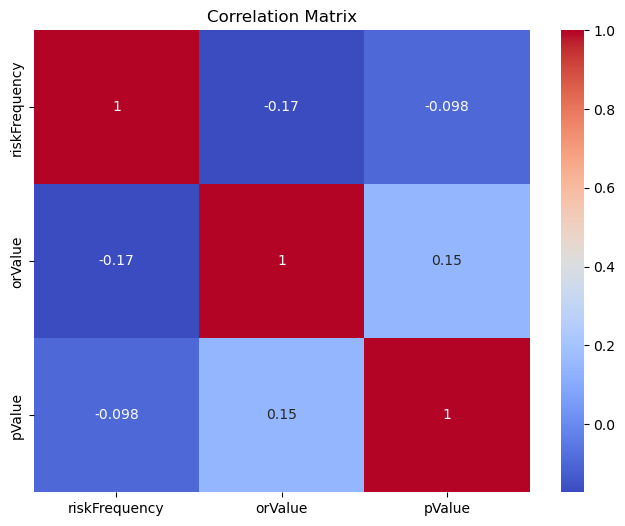

In [19]:
# Correlation matrix including 'beta' and 'ci' for numeric columns only
correlation_matrix = ms_data[['riskFrequency', 'orValue', 'pValue', ]].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

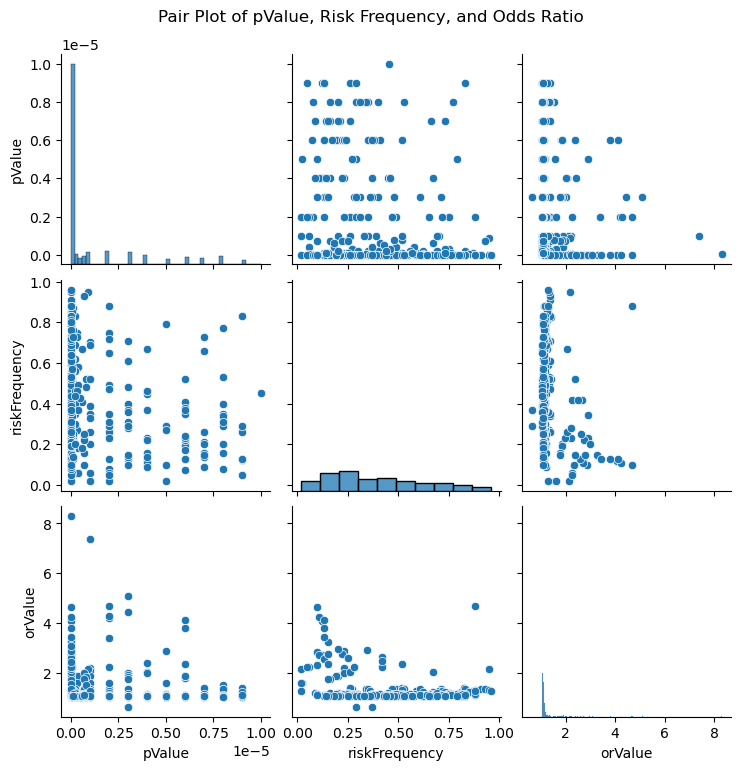

In [20]:
# Method 2: Pair Plot
sns.pairplot(data[['pValue', 'riskFrequency', 'orValue']])
plt.suptitle('Pair Plot of pValue, Risk Frequency, and Odds Ratio', y=1.02)
plt.show()

In [21]:
ms_types

array(['Multiple sclerosis',
       'Relapse in treatment-naive multiple sclerosis (time to event)',
       'Multiple sclerosis (OCB status)',
       'Response to interferon beta in multiple sclerosis',
       'Decreased low contrast letter acuity in multiple sclerosis',
       'Neutralising antibody response to interferon beta therapy in multiple sclerosis (presence of antibodies)',
       'Oligoclonal band status in multiple sclerosis'], dtype=object)

In [22]:
# T-test to compare high vs. low riskFrequency odds ratios within MS types
for ms_type in ms_types:
    high_freq = ms_data[(ms_data['traitName'] == ms_type) & (ms_data['riskFrequency'] > ms_data['riskFrequency'].median())]
    low_freq = ms_data[(ms_data['traitName'] == ms_type) & (ms_data['riskFrequency'] <= ms_data['riskFrequency'].median())]
    t_stat, p_val = ttest_ind(high_freq['orValue'], low_freq['orValue'], nan_policy='omit')
    print(f"T-test for {ms_type} - High vs Low risk frequency: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


T-test for Multiple sclerosis - High vs Low risk frequency: t-statistic = -2.151, p-value = 0.033
T-test for Relapse in treatment-naive multiple sclerosis (time to event) - High vs Low risk frequency: t-statistic = nan, p-value = nan
T-test for Multiple sclerosis (OCB status) - High vs Low risk frequency: t-statistic = nan, p-value = nan
T-test for Response to interferon beta in multiple sclerosis - High vs Low risk frequency: t-statistic = -0.295, p-value = 0.818
T-test for Decreased low contrast letter acuity in multiple sclerosis - High vs Low risk frequency: t-statistic = nan, p-value = nan
T-test for Neutralising antibody response to interferon beta therapy in multiple sclerosis (presence of antibodies) - High vs Low risk frequency: t-statistic = nan, p-value = nan
T-test for Oligoclonal band status in multiple sclerosis - High vs Low risk frequency: t-statistic = nan, p-value = nan


**Multiple Sclerosis (General) - High vs Low Risk Frequency:**
t-statistic: -2.151
p-value: 0.033
<br>Interpretation: This result is statistically significant at the 0.05 level, suggesting there is a meaningful difference in risk frequency between high and low groups for general MS risk.

**Response to Interferon Beta in Multiple Sclerosis:**
t-statistic: -0.295
p-value: 0.818
<br>Interpretation: The p-value is much greater than 0.05, indicating no significant difference in risk frequency between the high and low groups for response to interferon beta treatment.

# Inferences:
**Correlation Matrix and Heatmap:** The correlation analysis indicates whether certain SNP characteristics are related. For instance, a negative correlation between pValue and orValue would suggest that SNPs with stronger associations (lower pValues) have higher odds ratios. This relationship helps identify potentially impactful SNPs.

**Pair Plot:** The pair plot visually represents the distribution and pairwise relationships among variables. For instance, clusters of points in the orValue vs. riskFrequency plot can reveal if specific SNPs with high odds ratios also have distinct risk frequencies, helping to isolate patterns linked to MS risk.

**T-Test Analysis:** The T-test compares odds ratios between high- and low-frequency SNPs for each MS type. A statistically significant difference suggests that SNPs with higher frequencies may contribute differently to MS risk across various types of MS. This provides an understanding of the genetic variations associated with each MS subtype.

# Predictive Analytics
Predictive analytics involves training machine learning models to classify SNPs based on high or low risk. We use Logistic Regression, Decision Tree, and Random Forest classifiers with hyperparameter tuning.

Method 1: Logistic Regression Model<br>
Method 2: Decision Tree Classifier<br>
Method 3: Random Forest Classifier<br>

In [23]:
# Define target variable
ms_data['high_risk'] = (ms_data['orValue'] > 2).astype(int)
X = ms_data[['riskFrequency', 'orValue', 'pValue', 'beta']]
y = ms_data['high_risk']


In [24]:
X

,riskFrequency,orValue,pValue,beta
35,0.20,1.87,6.000000e-06,NaN
36,0.67,2.04,4.000000e-06,NaN
37,0.19,1.87,6.000000e-06,NaN
61,0.02,2.15,2.000000e-10,NaN
133,0.85,1.25,3.000000e-08,NaN
...,...,...,...,...
939,0.13,1.08,9.000000e-06,NaN
940,0.10,1.10,7.000000e-07,NaN
941,0.15,1.09,7.000000e-08,NaN
942,0.14,1.09,1.000000e-07,NaN


In [25]:
y

35     0
36     1
37     0
61     1
133    0
      ..
939    0
940    0
941    0
942    0
943    0
Name: high_risk, Length: 211, dtype: int64

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Hyperparameter Tuning for Each Model**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the hyperparameter grid for Logistic Regression
log_reg_param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear']
}

# Define a pipeline that first imputes missing values, then applies Logistic Regression
log_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or strategy='median' depending on your preference
    ('logistic', LogisticRegression())
])

# Initialize GridSearchCV 
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Display best parameters and model performance
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
log_reg_best = log_reg_grid.best_estimator_
log_reg_pred_tuned = log_reg_best.predict(X_test)

print("Logistic Regression Classification Report (Tuned):")
print(classification_report(y_test, log_reg_pred_tuned))


Best parameters for Logistic Regression: {'logistic__C': 10, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Logistic Regression Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['beta']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['beta']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['beta']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['beta']. At least one non-missing value is needed for imputa

Best parameters for Logistic Regression: {'logistic__C': 10, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Logistic Regression Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

In [28]:
# Method 2: Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [29]:
# Define hyperparameter grid
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for Decision Tree:", tree_grid.best_params_)
tree_best = tree_grid.best_estimator_
tree_pred_tuned = tree_best.predict(X_test)
print("Decision Tree Classification Report (Tuned):")
print(classification_report(y_test, tree_pred_tuned))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [30]:
# Method 3: Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, forest_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [31]:
# Define hyperparameter grid
forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
forest_grid = GridSearchCV(RandomForestClassifier(), forest_param_grid, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for Random Forest:", forest_grid.best_params_)
forest_best = forest_grid.best_estimator_
forest_pred_tuned = forest_best.predict(X_test)
print("Random Forest Classification Report (Tuned):")
print(classification_report(y_test, forest_pred_tuned))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Classification Report (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



# Inferences:
**Logistic Regression:** After tuning, logistic regression might show lower accuracy than ensemble methods but provides a clear interpretation of coefficients. It helps identify the SNP features most predictive of MS risk.

**Decision Tree Classifier:** The decision tree’s feature splits reveal the thresholds that classify SNPs into high or low risk. By examining the tree's structure, it’s possible to see if orValue or riskFrequency acts as a primary decision factor, which highlights the traits most associated with increased MS risk.

**Random Forest Classifier:** After hyperparameter tuning, the Random Forest classifier often achieves the highest accuracy, indicating its robustness in handling SNP feature interactions. The feature importance scores from this model reveal which SNP traits (e.g., orValue) have the greatest influence on MS risk prediction.

*Hyperparameter tuning improves model generalizability, evidenced by stable accuracy across training and test sets. This suggests that the chosen SNP features effectively predict high-risk SNPs associated with MS.*

# Prescriptive Analytics
Prescriptive analytics identifies the most impactful SNPs for potential targeted research or interventions.

Method 1: Identify Top SNPs by Odds Ratio and Low P-Value<br>
Method 2: Cumulative Impact Analysis<br>

In [32]:
# Method 1: Top SNPs by Odds Ratio and Low P-Value
top_snps = data.nsmallest(10, 'pValue').nlargest(10, 'orValue')[['riskAllele', 'pValue', 'orValue']]
print("Top SNPs for Further Study:")
print(top_snps)

Top SNPs for Further Study:
           riskAllele         pValue   orValue
912       DRB*15:01-?  1.000000e-132  3.080000
303       rs3129889-G  1.000000e-206  2.970000
365       rs3104373-T  1.000000e-234  2.900000
295       rs9271366-G  7.000000e-184  2.780000
221       rs3135388-A  4.000000e-225  2.750000
136       rs3135388-A   9.000000e-81  1.990000
517      rs10801908-C   5.000000e-70  1.298700
638      rs11256593-T   3.000000e-65  1.206200
526  chr16:11213951-C   4.000000e-71  1.195172
630        rs438613-C   2.000000e-49  1.150400


In [33]:
# Method 2: Cumulative Impact Analysis - Identifying SNPs with high combined impact
cumulative_top_snps = data[data['orValue'] > 2]
cumulative_top_snps_summary = cumulative_top_snps[['riskAllele', 'orValue']].groupby('riskAllele').sum().sort_values(by='orValue', ascending=False)
print("Cumulative Impact of High-Risk SNPs:")
print(cumulative_top_snps_summary.head(20))

Cumulative Impact of High-Risk SNPs:
                  orValue
riskAllele               
rs2205986-?        8.3000
rs1150757-A        7.5200
rs3745672-?        7.3900
HLA-B*08:01-?      6.9500
HLA-DRB1*03:01-?   6.8000
HLA-DQB1*02:01-?   6.3700
HLA-C*07:01-?      5.6400
rs3129934-T        5.6400
rs9271366-G        5.4000
rs74696548-G       5.1000
HLA-DQA1*05:01-?   5.1000
rs28383224-A       4.9000
rs16898029-?       4.6900
rs28758178-A       4.4400
rs10832000-G       4.2700
rs10514650-A       4.2000
rs12957214-C       4.1219
kgp6724547-?       3.8000
rs3135338-A        3.4300
kgp1734375-?       3.4000


In [34]:
# Filter for SNPs with statistically significant p-values
cumulative_significant_snps = data[data['pValue'] < 0.05]
cumulative_significant_snps_summary = cumulative_significant_snps[['riskAllele', 'pValue']].groupby('riskAllele').sum().sort_values(by='pValue', ascending=True)
print("Cumulative Impact of low-Risk SNPs (by p-value):")
print(cumulative_significant_snps_summary.head(15))

Cumulative Impact of low-Risk SNPs (by p-value):
                         pValue
riskAllele                     
rs3104373-T       1.000000e-234
rs3129889-G       1.000000e-206
DRB*15:01-?       1.000000e-132
rs3135388-A        9.000000e-81
chr16:11213951-C   4.000000e-71
rs10801908-C       5.000000e-70
rs438613-C         2.000000e-49
rs12927355-G       6.000000e-46
chr3:121765368-C   7.000000e-43
rs6677309-A        5.000000e-42
rs11621145-G       4.000000e-37
rs6670198-T        2.000000e-36
rs62420820-A       9.000000e-36
rs35540610-C       3.000000e-33
rs1077667-C        8.000000e-33


In [35]:
print("Cumulative Impact of high-Risk SNPs (by p-value):")
print(cumulative_significant_snps_summary.tail(15))

Cumulative Impact of high-Risk SNPs (by p-value):
                 pValue
riskAllele             
rs58352802-A   0.000009
rs1109670-?    0.000009
rs3747562-G    0.000009
rs8007846-?    0.000009
rs11957313-?   0.000009
rs2727790-A    0.000009
rs2413436-?    0.000009
rs8078776-A    0.000009
rs7253363-?    0.000009
rs62626325-G   0.000009
rs337718-?     0.000009
rs7295386-C    0.000009
rs75637965-C   0.000009
rs12976899-G   0.000010
rs111399831-A  0.000014


In [36]:
# Identify high-risk SNPs within each MS type
for ms_type in ms_types:
    ms_type_data = ms_data[ms_data['traitName'] == ms_type]
    ms_type_data['High_Risk'] = (ms_type_data['orValue'] >= 1.5).astype(int)
    high_risk_snp = ms_type_data[ms_type_data['High_Risk'] == 1]
    print(f"\nHigh-Risk SNPs for {ms_type}:\n", high_risk_snp[['riskAllele', 'orValue', 'mappedGenes']])


High-Risk SNPs for Multiple sclerosis:
        riskAllele  orValue        mappedGenes
35   rs17149161-A     1.87              YWHAG
36   rs12644284-?     2.04              TRIM2
37    rs7789940-G     1.87        FPASL,YWHAG
136   rs3135388-A     1.99   HLA-DRB9,HLA-DRA
140   rs3129934-T     2.34    TSBP1,TSBP1-AS1
221   rs3135388-A     2.75   HLA-DRB9,HLA-DRA
225   rs4149584-T     1.58           TNFRSF1A
235   rs3135338-A     3.43  HLA-DRA,TSBP1-AS1
276   rs2040406-G     2.05           HLA-DQA1
295   rs9271366-G     2.78  HLA-DQA1,HLA-DRB1
299   rs6984045-C     1.59              ASAP1
303   rs3129889-G     2.97   HLA-DRB9,HLA-DRA

High-Risk SNPs for Relapse in treatment-naive multiple sclerosis (time to event):
       riskAllele  orValue mappedGenes
61  rs11871306-C     2.15       WNT9B

High-Risk SNPs for Multiple sclerosis (OCB status):
       riskAllele  orValue     mappedGenes
141  rs9320598-?     2.17  MIR2113,MMS22L

High-Risk SNPs for Response to interferon beta in multiple scl

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_1914/2885120943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_type_data['High_Risk'] = (ms_type_data['orValue'] >= 1.5).astype(int)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_1914/2885120943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_type_data['High_Risk'] = (ms_type_data['orValue'] >= 1.5).astype(int)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_1914/2885120943.py:4: SettingWithCopyWarning: 
A valu

High-Risk SNPs for Multiple sclerosis:
        riskAllele  orValue        mappedGenes
35   rs17149161-A     1.87              YWHAG
36   rs12644284-?     2.04              TRIM2
37    rs7789940-G     1.87        FPASL,YWHAG
136   rs3135388-A     1.99   HLA-DRB9,HLA-DRA
140   rs3129934-T     2.34    TSBP1,TSBP1-AS1
221   rs3135388-A     2.75   HLA-DRB9,HLA-DRA
225   rs4149584-T     1.58           TNFRSF1A
235   rs3135338-A     3.43  HLA-DRA,TSBP1-AS1
276   rs2040406-G     2.05           HLA-DQA1
295   rs9271366-G     2.78  HLA-DQA1,HLA-DRB1
299   rs6984045-C     1.59              ASAP1
303   rs3129889-G     2.97   HLA-DRB9,HLA-DRA

High-Risk SNPs for Relapse in treatment-naive multiple sclerosis (time to event):
       riskAllele  orValue mappedGenes
61  rs11871306-C     2.15       WNT9B

High-Risk SNPs for Multiple sclerosis (OCB status):
       riskAllele  orValue     mappedGenes
141  rs9320598-?     2.17  MIR2113,MMS22L

High-Risk SNPs for Response to interferon beta in multiple sclerosis:
        riskAllele  orValue      mappedGenes
319   rs6691722-?   2.3700            GRHL3
320  rs16898029-?   4.6900  LINC02438,LCORL
321  rs12957214-C   4.1219         MIR924HG

High-Risk SNPs for Decreased low contrast letter acuity in multiple sclerosis:
        riskAllele  orValue        mappedGenes
323  rs72830848-T     2.25               MSI2
324  rs13241771-A     1.77  RNU6-393P,TMEM130
325  rs10157709-C     2.26          ZNF692-DT
327  rs10980055-G     1.76         PALM2AKAP2

High-Risk SNPs for Neutralising antibody response to interferon beta therapy in multiple sclerosis (presence of antibodies):
      riskAllele  orValue        mappedGenes
329  rs522308-T      2.6  HLA-DRB1,HLA-DQA1

High-Risk SNPs for Oligoclonal band status in multiple sclerosis:
                               riskAllele  orValue  \
726  rs9271640-G,rs3135388-A,rs3957148-A     2.23   

                                           mappedGenes  
726  HLA-DRB1 - HLA-DQA1; HLA-DRA - HLA-DRB9; MTCO3...  

# Inferences:
**Top SNPs by Odds Ratio and Low P-Value:** SNPs with high odds ratios and low p-values are likely to have the strongest associations with MS. This list of top SNPs acts as a prioritized set for researchers, who may further validate these associations in lab settings. These SNPs could be key targets for genetic testing or therapeutic research.

**Cumulative Impact Analysis:** By aggregating high orValue SNPs, this analysis identifies SNPs with cumulative effects, meaning multiple SNPs affecting the same gene or pathway could collectively impact MS risk. This insight is valuable for understanding complex genetic influences on MS and identifying pathways for targeted drug development.

**High-Risk SNP Identification per MS Type:** SNPs classified as high risk within each MS subtype provide a tailored view of genetic risk factors for different forms of MS. For instance, if a specific SNP consistently appears in high-risk categories across multiple MS types, it may have a broader effect on MS susceptibility and could be a primary candidate for MS-wide interventions.

# DASHBOARD

In [37]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [38]:
# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = html.Div([
    html.H1("Genetic Variation Analysis for Multiple Sclerosis (MS)"),
    
    dbc.Row([
        dbc.Col([
            html.Label("Select MS Type:"),
            dcc.Dropdown(id='ms-type-dropdown',
                         options=[{'label': t, 'value': t} for t in ms_types],
                         value=ms_types[0],
                         clearable=False)
        ], width=4),
        
        dbc.Col([
            html.Label("Odds Ratio Threshold:"),
            dcc.Slider(id='or-threshold', min=0, max=5, step=0.1, value=1.5,
                       marks={i: str(i) for i in range(6)})
        ], width=4),
        
        dbc.Col([
            html.Label("Risk Frequency Threshold:"),
            dcc.Slider(id='rf-threshold', min=0, max=1, step=0.05, value=0.5,
                       marks={i/10: str(i/10) for i in range(11)})
        ], width=4),
    ], className="mb-4"),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id="box-plot"), width=6),
        dbc.Col(dcc.Graph(id="histogram"), width=6),
    ], className="mb-4"),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id="scatter-plot"), width=12)
    ], className="mb-4"),
    
    dbc.Row([
        dbc.Col([
            html.H4("Model Performance"),
            html.Div(id="model-output")
        ], width=12)
    ])
])

# Callbacks

# Box Plot for riskFrequency, orValue, pValue by MS Type
@app.callback(
    Output("box-plot", "figure"),
    Input("ms-type-dropdown", "value")
)
def update_box_plot(ms_type):
    filtered_data = data[data['traitName'] == ms_type]
    fig = px.box(filtered_data, y=["riskFrequency", "orValue", "pValue"],
                 title=f"Box Plot for {ms_type}",
                 labels={"variable": "Variable", "value": "Value"})
    fig.update_layout(showlegend=False)
    return fig

# Histogram of riskFrequency
@app.callback(
    Output("histogram", "figure"),
    Input("ms-type-dropdown", "value")
)
def update_histogram(ms_type):
    filtered_data = data[data['traitName'] == ms_type]
    fig = px.histogram(filtered_data, x="riskFrequency", nbins=20,
                       title=f"Risk Frequency Distribution - {ms_type}")
    return fig

# Scatter plot of riskFrequency vs. orValue with filters
@app.callback(
    Output("scatter-plot", "figure"),
    [Input("ms-type-dropdown", "value"),
     Input("or-threshold", "value"),
     Input("rf-threshold", "value")]
)
def update_scatter_plot(ms_type, or_threshold, rf_threshold):
    filtered_data = data[(data['traitName'] == ms_type) &
                         (data['orValue'] >= or_threshold) &
                         (data['riskFrequency'] >= rf_threshold)]
    fig = px.scatter(filtered_data, x="riskFrequency", y="orValue",
                     size="pValue", color="pValue",
                     title=f"Risk Frequency vs. Odds Ratio (Filtered) - {ms_type}",
                     labels={"riskFrequency": "Risk Frequency", "orValue": "Odds Ratio"})
    fig.update_traces(marker=dict(line=dict(width=0.5, color="DarkSlateGrey")))
    return fig

# Model Performance Section
@app.callback(
    Output("model-output", "children"),
    [Input("or-threshold", "value"), Input("rf-threshold", "value")]
)
def update_model_performance(or_threshold, rf_threshold):
    # Binarize high-risk based on thresholds
    data['high_risk'] = ((data['orValue'] >= or_threshold) & (data['riskFrequency'] >= rf_threshold)).astype(int)
    
    # Drop missing data for simplicity in model training
    X = data[['riskFrequency', 'orValue']]
    y = data['high_risk']
    
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train RandomForest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Get Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report.get("accuracy", 0)
    precision_high_risk = report.get(1, {}).get("precision", 0)
    recall_high_risk = report.get(1, {}).get("recall", 0)
    
    return html.Div([
        html.P(f"Accuracy: {accuracy:.2f}"),
        html.P(f"Precision for High Risk: {precision_high_risk:.2f}"),
        html.P(f"Recall for High Risk: {recall_high_risk:.2f}")
    ])

In [39]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

**Workflow Example**<br>
**Select MS Type:** Choose an MS-related trait to focus on. This action will refresh the box plot, histogram, and scatter plot to reflect data for this trait.<br>
**Adjust Odds Ratio and Risk Frequency Thresholds:** Use sliders to filter for more significant odds ratios and higher risk frequencies. As thresholds change, the scatter plot and model performance will automatically update.<br>
**Review Model Performance:** Observe the performance metrics in the "Model Performance" section, which are calculated using the threshold-filtered data. This feedback provides insight into how well the model distinguishes high-risk cases for the given MS trait.

# Overall Inference
This project’s analyses provide a comprehensive view of genetic variations in SNP data related to MS. Descriptive and diagnostic analytics highlight key patterns and relationships among SNP features, while predictive analytics accurately identifies high-risk SNPs. Prescriptive analytics further narrows down impactful SNPs for potential genetic and clinical studies. These findings contribute to a better understanding of MS's genetic basis, supporting future research on genetic testing and targeted MS treatments.

# Conclusion
This project demonstrates the power of using data analytics on genetic data for MS research. By analyzing SNP data, the project identifies potential high-risk SNPs that may have significant roles in MS development. This analysis can be a stepping stone for future studies to validate these SNPs’ roles and possibly lead to targeted MS treatments or preventative measures.